In [115]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scikitplot as skplt
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split , GridSearchCV
import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , roc_curve

In [116]:
df = pd.read_csv("C:/Users/edenl/Desktop/file_rouge/notebook/original_data/clean_heart_failure_data.csv")
df

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,12,1,1,41,147,0,1,98,0,10,2,0
1,1,21,0,2,55,40,0,1,82,0,20,1,1
2,2,9,1,1,31,141,0,2,25,0,10,2,0
3,3,20,0,0,39,72,0,1,34,1,25,1,1
4,4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,17,1,3,14,122,0,1,58,0,22,1,1
914,914,40,1,0,45,51,1,1,67,0,42,1,1
915,915,29,1,0,31,9,0,1,41,1,22,1,1
916,916,29,0,1,31,94,0,0,100,0,10,1,1


In [117]:
df = df.drop("Unnamed: 0" , axis=1)

In [118]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [119]:
X = df.drop(["HeartDisease" ], axis=1)
# X is the dataframe without the target 

y = df.HeartDisease
#y is the target 

In [120]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#we are splitting the dataset with train test split a test size of 20 percent of test and 80 percent of train 


In [121]:
preprocessing_sm = SMOTE(sampling_strategy='auto')
preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())])

model_log = linear_model.LogisticRegression( C=0.1 , solver='lbfgs')

In [122]:
pipeline_log = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                                ['LogisticRegression', model_log]
                                     ])

In [123]:
pipeline_log.fit(X_train , y_train)

Pipeline(steps=[('preprocessing_Standard_scaler',
                 Pipeline(steps=[('standard scaler', StandardScaler())])),
                ['LogisticRegression', LogisticRegression(C=0.1)]])

In [124]:
print("accuracy train : %.3f"%pipeline_log.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log.score(X_test , y_test))

accuracy train : 0.858
accuracy test : 0.832


In [125]:
y_pred_log = pipeline_log.predict(X_test)
y_pred_log

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [126]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        77
           1       0.90      0.79      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



In [127]:
pipeline_log.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing_Standard_scaler', 'LogisticRegression', 'preprocessing_Standard_scaler__memory', 'preprocessing_Standard_scaler__steps', 'preprocessing_Standard_scaler__verbose', 'preprocessing_Standard_scaler__standard scaler', 'preprocessing_Standard_scaler__standard scaler__copy', 'preprocessing_Standard_scaler__standard scaler__with_mean', 'preprocessing_Standard_scaler__standard scaler__with_std', 'LogisticRegression__C', 'LogisticRegression__class_weight', 'LogisticRegression__dual', 'LogisticRegression__fit_intercept', 'LogisticRegression__intercept_scaling', 'LogisticRegression__l1_ratio', 'LogisticRegression__max_iter', 'LogisticRegression__multi_class', 'LogisticRegression__n_jobs', 'LogisticRegression__penalty', 'LogisticRegression__random_state', 'LogisticRegression__solver', 'LogisticRegression__tol', 'LogisticRegression__verbose', 'LogisticRegression__warm_start'])

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

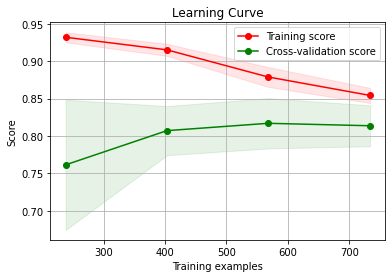

In [128]:
plot_learning_curve(pipeline_log, X , y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

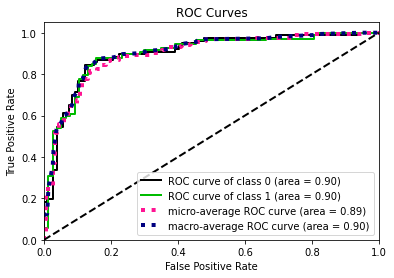

In [129]:
y_probas = pipeline_log.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

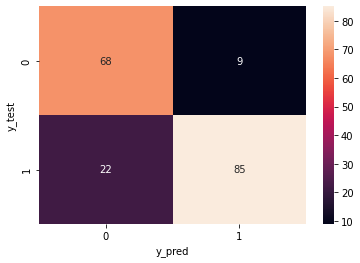

In [130]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()

In [131]:
importances = model_log.coef_[0]
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

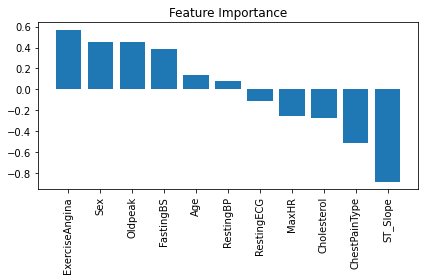

In [132]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Using grid search to found best hyper parameters

In [133]:

# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
# Create grid search object

clf = GridSearchCV(model_log, param_grid)

# Fit on dat': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

best_clf = clf.fit(X_train, y_train)
best_clf.best_params_

c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

testing hyperparameter and SMOTE

In [134]:
pipeline_log_sm = imbpipeline(steps = [['smote'  , preprocessing_sm],
                                ['LogisticRegression', model_log]
                                     ])

In [135]:
pipeline_log_sm.fit(X_train , y_train.values)

c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('smote', SMOTE()),
                ['LogisticRegression', LogisticRegression(C=0.1)]])

In [136]:
print("accuracy train : %.3f"%pipeline_log_sm.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_log_sm.score(X_test , y_test))


accuracy train : 0.860
accuracy test : 0.815


In [137]:
y_pred_log_sm = pipeline_log_sm.predict(X_test)
y_pred_log_sm

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [138]:
print(classification_report(y_test, y_pred_log_sm))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        77
           1       0.90      0.77      0.83       107

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.81       184
weighted avg       0.83      0.82      0.82       184



c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\edenl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

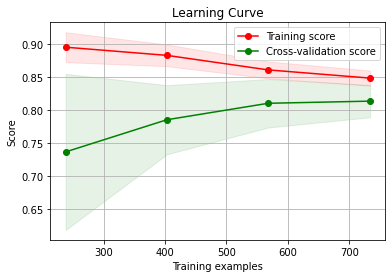

In [139]:
plot_learning_curve(pipeline_log_sm, X , y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

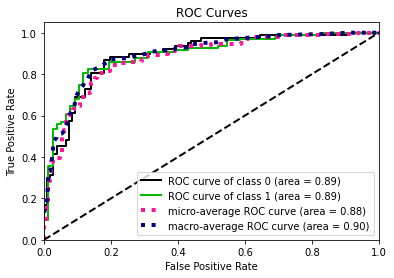

In [140]:

y_probas_log_sm = pipeline_log_sm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_log_sm)

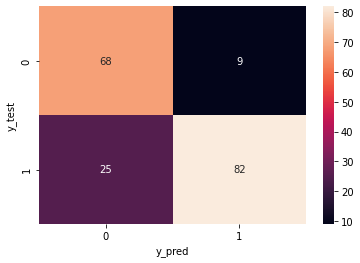

In [141]:
cm = confusion_matrix(y_test, y_pred_log_sm)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()